In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Read the image
def t2n(images_array):
  for img_path in images_array:
    input_path = os.path.join('Train',img_path)
    # print(new_contour)
    image = cv2.imread(input_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image
    threshold_value = 185
    ret, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the thresholded image
    thresholded_image = cv2.bitwise_not(thresholded_image)
    # cv2_imshow(thresholded_image)
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty mask
    mask = np.zeros_like(gray_image)
    
      # Iterate through contours
    new_contours = ()
    MIN_HEIGHT = image.shape[1] * 0.5
    for cnt in contours:
          x, y, w, h = cv2.boundingRect(cnt)
          if h >= MIN_HEIGHT:
              new_contours += (cnt,)
    con = new_contours[0]
    cv2.drawContours(mask, [con], -1, (255), thickness=cv2.FILLED)
        # Apply the mask to the original image
        # result = cv2.bitwise_and(image, image, mask=mask)
        # cv2_imshow(result)
    # Invert the mask
    # mask = cv2.bitwise_not(mask)

    # # Apply the mask to the original image
    result = cv2.bitwise_and(image, image, mask=mask)
    # cv2_imshow(result)

    # Display the result
    save_path = os.path.join('New_Train', img_path)
    cv2.imwrite(save_path, result)
    # print(type(contours))

In [6]:
img_paths = []
for path in os.listdir("Train"):
    img_paths.append(path)

In [7]:
t2n(img_paths)

In [9]:
img_paths

['6H E1 (1).png',
 'D1_2h1.jpeg',
 '0h (1).png',
 '0h (2).png',
 '0h (2)_clahe.png',
 '0H E1 (1).png',
 '0H E1 (2).png',
 '0h E1.png',
 '0h.png',
 '10h (1).png',
 '10h (2).png',
 '10h.png',
 '20h (1).png',
 '20h (2).png',
 '20h.png',
 '24h (1).png',
 '24h (2).png',
 '24h.png',
 '2h (1).png',
 '2h (2).png',
 '2H E1 (1).png',
 '2H E1 (2).png',
 '2H E1.png',
 '2h.png',
 '4h (1).png',
 '4h (2).png',
 '4H E1 (1).png',
 '4H E1 (2).png',
 '4H E1.png',
 '4h.png',
 '6h (1).png',
 '6h (2).png',
 '6H E1 (2).png',
 '6H E1.png',
 '6h.png',
 '7.5h (1).png',
 '7.5h (2).png',
 '7.5h.png',
 'D1_0h1.jpeg',
 'D1_0h2.jpeg',
 'D1_10h.jpeg',
 'D1_12h1.jpeg',
 'D1_12h2.jpeg',
 'D1_12h3.jpeg',
 'D1_20h2.jpeg',
 'D1_20h3.jpeg',
 'D1_2h2.jpeg',
 'D1_2h3.jpeg',
 'D1_4h1.jpeg',
 'D1_4h2.jpeg',
 'D1_4h3.jpeg',
 'D1_6h1.jpeg',
 'D1_6h2.jpeg',
 'D1_8h1.jpeg',
 'D1_8h2.jpeg',
 'D1_8h3.jpeg',
 'F1-B2-0h-03.png']

In [8]:
def is_ellipse_or_circle(contour):
    """Check if a contour is approximately a circle or an ellipse."""
    if len(contour) >= 5:  # Minimum number of points required to fit an ellipse
        ellipse = cv2.fitEllipse(contour)
        (x, y), (MA, ma), angle = ellipse
        # Calculate the aspect ratio of the ellipse
        aspect_ratio = MA / ma
        # Check if the aspect ratio is approximately 1 (circular) or within a reasonable range for an oval
        if 0.5 <= aspect_ratio <= 2:
            return True
    return False

def crop_img(img_path, lower_color, upper_color, save_dir,i):
    # Đọc ảnh
    image = cv2.imread(img_path)

    # Chuyển đổi ảnh sang không gian màu HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Tạo mask cho màu đỏ
    mask = cv2.inRange(hsv_image, lower_color, upper_color)

    # Tìm các đường viền trên mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    dem = 0
    MAX_WIDTH = image.shape[1] * 0.07
    MIN_HEIGHT = 30
    
    for contour in contours:
        if is_ellipse_or_circle(contour):
            x, y, w, h = cv2.boundingRect(contour)
            if w <= MAX_WIDTH and h >= MIN_HEIGHT:
                dem += 1
                cropped_image = image[y:y+h, x:x+w]
                endwith = str(i) + "_{}.png".format(dem)
                save_path = os.path.join(save_dir, endwith)
                cv2.imwrite(save_path, cropped_image)
                cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

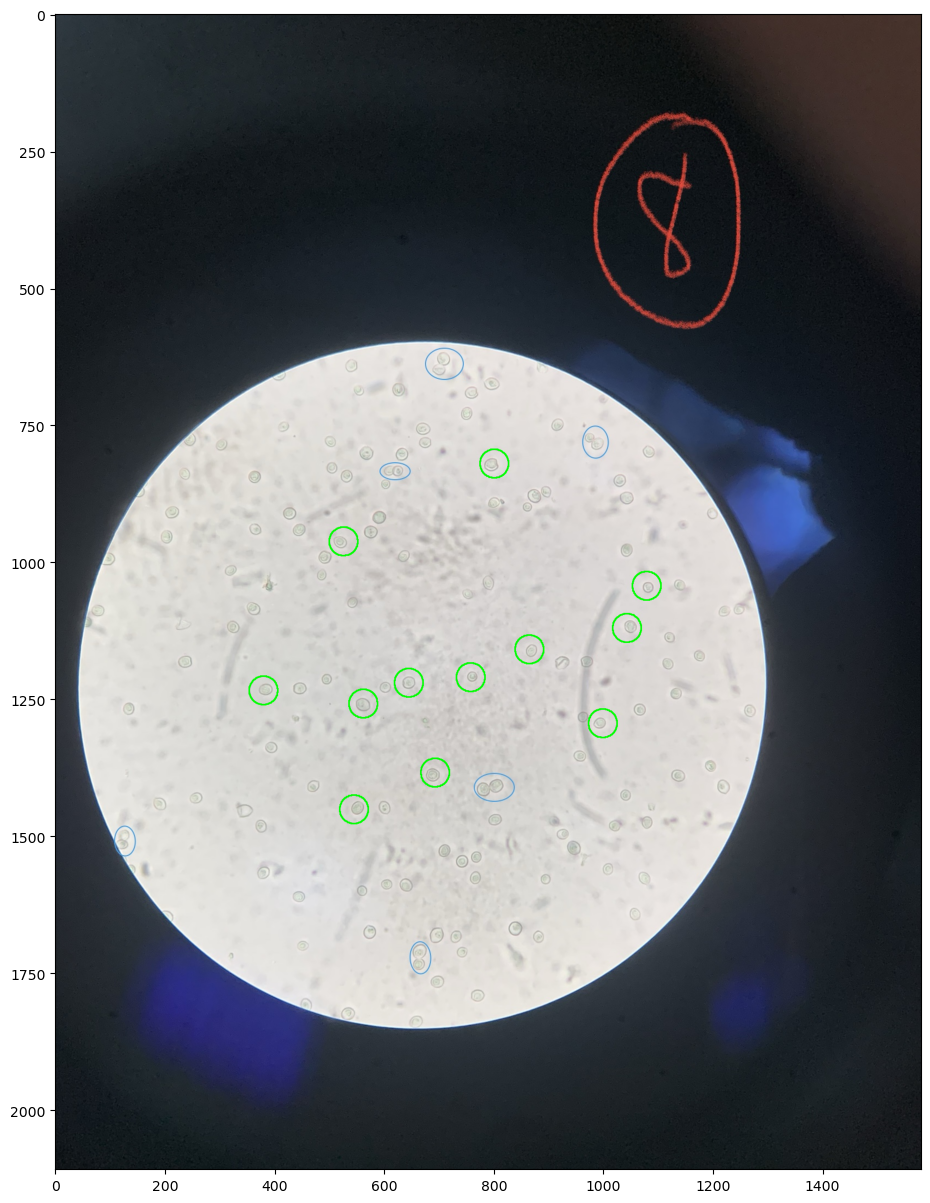

In [30]:
img_path = "Train/D1_20h3.jpeg"
lower_cyan = np.array([100, 100, 100])
upper_cyan = np.array([120, 255, 255])
save_path = "saved/abnormal2x"
crop_img(img_path,lower_cyan,upper_cyan,save_path,1)

In [10]:
images = []
for img in os.listdir("New_Train"):
    images.append(os.path.join("New_Train",img))
lower_red = np.array([160, 100, 100])
upper_red = np.array([179, 255, 255])

lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

lower_purple = np.array([125, 50, 50])
upper_purple = np.array([155, 255, 255])

lower_cyan = np.array([100, 100, 100])
upper_cyan = np.array([120, 255, 255])

save_path_normal = "saved/normal"
save_path_normal2x = "saved/normal2x"
save_path_abnormal = "saved/abnormal"
save_path_abnormal2x = "saved/abnormal2x"
for i in range(len(images)):
    crop_img(images[i],lower_red, upper_red, save_path_normal,i)
    crop_img(images[i],lower_green, upper_green,save_path_normal2x,i)
    crop_img(images[i],lower_purple, upper_purple,save_path_abnormal,i)
    crop_img(images[i],lower_cyan, upper_cyan,save_path_abnormal2x,i)
    
    